In [58]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [53]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    #dt=1/(np.abs(np.round(x[1])-np.round(x[0])))
    #if f>dt:
        #return "Frecuencia mayor al limite de Nyquist"    PREGUNTAR!!
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [56]:
t_max=20
N=200
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t)
y=f(t)
y_2=f(t)

In [57]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(1.762749271162831-0.08309250769127503j)

## PUNTO 2 c

In [222]:
f_0=1/(t[1]-t[0])
frecuencias=np.linspace(0,f_0,len(t))
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)

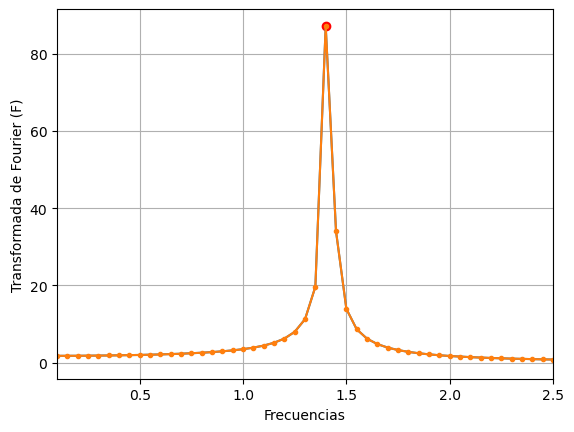

In [221]:
plt.plot(frecuencias,F)
plt.plot(frecuencias,F,".-")
plt.xlim(0.1,2.5)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.scatter(frecuencias[indice_altura_max],F[indice_altura_max],color="r")
#plt.scatter(frecuencias[i1],F[i1],color="r")
#plt.scatter(frecuencias[i2],F[i2],color="r")
#plt.axvline(f_0/2)
plt.grid()

## PUNTO 2 D

In [223]:
##Ruido
ruido=np.random.normal(0.0,0.1,t.shape[0])
y=ruido+y

In [ ]:
F_new=norma_transformada()

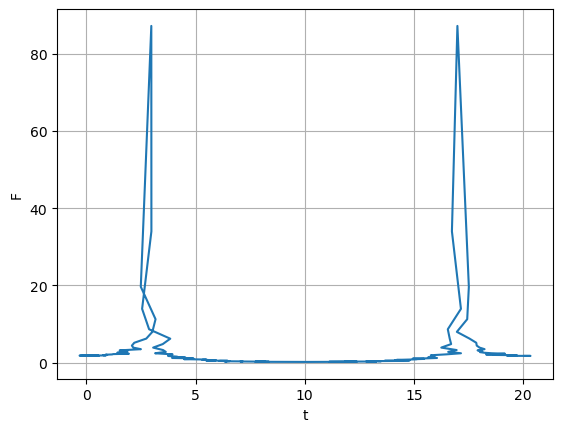

In [97]:
plt.plot(t_new,F)
plt.xlabel("t")
plt.ylabel("F")
plt.grid()

In [207]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(F2[i1]-F2[i2])
    return distancia

In [208]:
pico_FWHM(F,frecuencias)

array([14.3607486])